In [3]:
import pandas as pd
import numpy as np

In [4]:
aq_csv = "waqi-covid19-airqualitydata-2020.csv"

In [5]:
aq_data = pd.read_csv(aq_csv)
aq_data.head()

FileNotFoundError: [Errno 2] File waqi-covid19-airqualitydata-2020.csv does not exist: 'waqi-covid19-airqualitydata-2020.csv'

In [6]:
date = ["201-01-01", "2014-01-02", "2014-01-03", "2014-01-04", "2014-01-05", "2014-01-06"]
pm25 = [233, 233, 252, 268, 189, 252]

sample_df = pd.DataFrame({"Date": date, "pm25": pm25})
sample_df

,Date,pm25
0,201-01-01,233
1,2014-01-02,233
2,2014-01-03,252
3,2014-01-04,268
4,2014-01-05,189
5,2014-01-06,252


In [7]:
!pip install calmap
import calmap
import matplotlib.pyplot as plt

In [8]:
china = aq_data.loc[aq_data['City'] == 'Beijing']

NameError: name 'aq_data' is not defined

In [ ]:
china.head()

In [ ]:
diep_csv = "CleanDatasets/diepkloof_final.csv"

In [9]:
diep_data = pd.read_csv(diep_csv)
diep_data.head()

NameError: name 'diep_csv' is not defined

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sns.set()

In [12]:
flights_long = sns.load_dataset("flights")

In [13]:
flights_long.dtypes

year             int64
month         category
passengers       int64
dtype: object

In [14]:
flights_long.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [14]:
flights = flights_long.pivot("month", "year", "passengers")

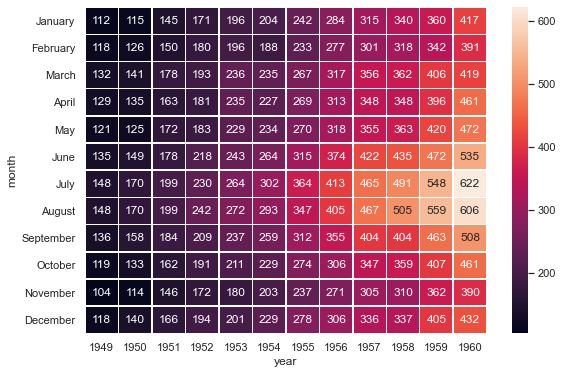

In [15]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [16]:
flights_long.dtypes

year             int64
month         category
passengers       int64
dtype: object

In [17]:
import calendar

In [18]:
diep_data[['year','month','day']] = diep_data['date'].str.split('-',expand=True)

NameError: name 'diep_data' is not defined

In [19]:
diep_data.head()

,date,pm25,pm10,o3,no2,so2,co,year,month,day
0,2020-07-02,83,49,13,9,1,7,2020,07,02
1,2020-07-03,99,39,10,11,11,5,2020,07,03
2,2020-07-04,84,55,19,12,6,6,2020,07,04
3,2020-07-05,110,39,15,7,2,5,2020,07,05
4,2020-07-06,89,48,10,13,4,9,2020,07,06


In [20]:
diep_data['month'] = diep_data['month'].astype(str).astype(int)

In [21]:
diep_data['month'] = diep_data['month'].apply(lambda x: calendar.month_abbr[x])

In [22]:
diep_data.head()

,date,pm25,pm10,o3,no2,so2,co,year,month,day
0,2020-07-02,83,49,13,9,1,7,2020,Jul,02
1,2020-07-03,99,39,10,11,11,5,2020,Jul,03
2,2020-07-04,84,55,19,12,6,6,2020,Jul,04
3,2020-07-05,110,39,15,7,2,5,2020,Jul,05
4,2020-07-06,89,48,10,13,4,9,2020,Jul,06


In [23]:
diep_data.dtypes

date     object
 pm25     int64
 pm10     int64
 o3       int64
 no2      int64
 so2      int64
 co       int64
year     object
month    object
day      object
dtype: object

In [40]:
diep = diep_data

In [34]:
diep_data['day'] = diep_data['day'].astype(str).astype('int64')

In [35]:
diep_data['year'] = diep_data['year'].astype(str).astype('int64')

In [36]:
diep_data['month'] = diep_data['month'].astype(str).astype('category')

In [37]:
diep_data.dtypes

date       object
 pm25       int64
 pm10       int64
 o3         int64
 no2        int64
 so2        int64
 co         int64
year        int64
month    category
day         int64
dtype: object

In [15]:
diepaq = diep_data.pivot('month','day',' pm25')

NameError: name 'diep_data' is not defined

ValueError: Unknown format code 'd' for object of type 'float'

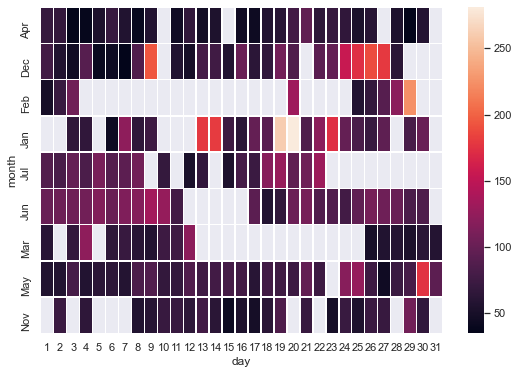

In [50]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(diepaq, annot=True, fmt="d", linewidths=.5, ax=ax)

In [51]:
import gmaps

In [52]:
# Dependencies
import requests
import json

# Google developer API key
from config import gkey

# Target city
target_city = "Diepkloof, South Africa"

# Build the endpoint URL
target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(target_city, gkey)

In [53]:
# Run a request to endpoint and convert result to json
geo_data = requests.get(target_url).json()

# Print the json (pretty printed)
print(json.dumps(geo_data, indent=4, sort_keys=True))

{
    "results": [
        {
            "address_components": [
                {
                    "long_name": "Diepmeadow",
                    "short_name": "Diepmeadow",
                    "types": [
                        "locality",
                        "political"
                    ]
                },
                {
                    "long_name": "City of Johannesburg Metropolitan Municipality",
                    "short_name": "City of Johannesburg Metropolitan Municipality",
                    "types": [
                        "administrative_area_level_2",
                        "political"
                    ]
                },
                {
                    "long_name": "Gauteng",
                    "short_name": "GP",
                    "types": [
                        "administrative_area_level_1",
                        "political"
                    ]
                },
                {
                    "long_name": "South Africa"

In [55]:
# Extract latitude and longitude
dieplat = geo_data["results"][0]["geometry"]["location"]["lat"]
dieplng = geo_data["results"][0]["geometry"]["location"]["lng"]

# Print the latitude and longitude
print('''
    City: {0}
    Latitude: {1}
    Longitude: {2}
    '''.format(target_city, dieplat, dieplng))


    City: Diepkloof, South Africa
    Latitude: -26.2429271
    Longitude: 27.9497171
    


In [57]:
diep_data[' pm25'].max()

281

In [59]:
diep1_pm25 = diep_data.iloc[0,1]

In [61]:
# Set up Map components. Location (lat/lng) and Humidity
location = dieplat,dieplng
pm25 = diep1_pm25

center_coord = (dieplat,dieplng)
# Plot Heatmap
figure_layout = {'width': '600px', 'height': '400px', 'border': '1px solid black',
                'padding': '1px', 'margin': '0 auto 0 auto'}
fig = gmaps.figure(layout=figure_layout, center=center_coord, zoom_level=10)

# Add Pollution Layer to Heatmap
heat_layer = gmaps.heatmap_layer(location, weights=pm25, dissipating=False, point_radius=1.5, max_intensity = 281)

# Add heatlayer
fig.add_layer(heat_layer)

# Display figure
fig

TypeError: object of type 'numpy.int64' has no len()

In [66]:
diep1 = diep_data.assign(Latitude=dieplat)

In [68]:
diep2 = diep1.assign(Longitude=dieplng)
diep2.head()

,date,pm25,pm10,o3,no2,so2,co,year,month,day,Latitude,Longitude
0,2020-07-02,83,49,13,9,1,7,2020,Jul,2,-26.242927,27.949717
1,2020-07-03,99,39,10,11,11,5,2020,Jul,3,-26.242927,27.949717
2,2020-07-04,84,55,19,12,6,6,2020,Jul,4,-26.242927,27.949717
3,2020-07-05,110,39,15,7,2,5,2020,Jul,5,-26.242927,27.949717
4,2020-07-06,89,48,10,13,4,9,2020,Jul,6,-26.242927,27.949717


In [ ]:
## code: https://jupyter-gmaps.readthedocs.io/en/latest/app_tutorial.html ##
from IPython.display import display
import ipywidgets as widgets

import gmaps


class AcledExplorer(object):
    """
    Jupyter widget for exploring the ACLED dataset.

    The user uses the slider to choose a year. This renders
    a heatmap of civilian victims in that year.
    """

    def __init__(self, df):
        self._df = df
        self._heatmap = None
        self._slider = None
        initial_year = min(self._df['year'])

        title_widget = widgets.HTML(
            '<h3>Civilian casualties in Africa, by year</h3>'
            '<h4>Data from <a href="https://aqicn.org/data-platform/register/">Air Quality Historical Data Platform</a></h4>'
        )

        map_figure = self._render_map(initial_year)
        controls = self._render_controls(initial_year)
        self._container = widgets.VBox([title_widget, controls, map_figure])

    def render(self):
        display(self._container)

    def _on_year_change(self, change):
        year = self._slider.value
        self._heatmap.locations = self._locations_for_year(year)
        self._total_box.value = self._total_casualties_text_for_year(year)
        return self._container

    def _render_map(self, initial_year):
        fig = gmaps.figure(map_type='HYBRID')
        self._heatmap = gmaps.heatmap_layer(
            self._locations_for_year(initial_year),
            max_intensity=100,
            point_radius=8
        )
        fig.add_layer(self._heatmap)
        return fig

    def _render_controls(self, initial_year):
        self._slider = widgets.IntSlider(
            value=initial_year,
            min=min(self._df['year']),
            max=max(self._df['year']),
            description='Year',
            continuous_update=False
        )
        self._total_box = widgets.Label(
            value=self._total_casualties_text_for_year(initial_year)
        )
        self._slider.observe(self._on_year_change, names='value')
        controls = widgets.HBox(
            [self._slider, self._total_box],
            layout={'justify_content': 'space-between'}
        )
        return controls

    def _locations_for_year(self, year):
        return self._df[self._df['year'] == year][['latitude', 'longitude']]

    def _total_casualties_for_year(self, year):
        return int(self._df[self._df['year'] == year]['year'].count())

    def _total_casualties_text_for_year(self, year):
        return '{} civilian casualties'.format(self._total_casualties_for_year(year))


AcledExplorer(df).render()